### Feature Extraction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
x=df.drop(columns=["Type"])
y=df["Type"]

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [13]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(sc_xtrain)
pca.explained_variance_ratio_

array([3.04487815e-01, 2.35749308e-01, 1.45880130e-01, 1.27572324e-01,
       1.00023621e-01, 4.75744210e-02, 3.11861975e-02, 7.33192445e-03,
       1.94259834e-04])

In [15]:
# elbow plot for variance_dimension
val=np.cumsum(pca.explained_variance_ratio_)*100
val

array([ 30.44878146,  54.02371226,  68.61172526,  81.36895762,
        91.37131972,  96.12876182,  99.24738157,  99.98057402,
       100.        ])

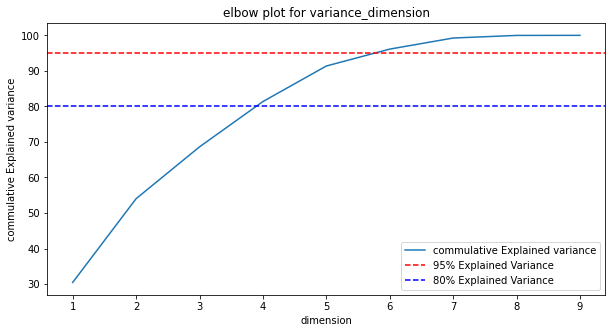

In [17]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(val)+1),val,label="commulative Explained variance")
plt.axhline(y=95,color='r',linestyle='--',label="95% Explained Variance")
plt.axhline(y=80,color='b',linestyle='--',label="80% Explained Variance")
plt.title("elbow plot for variance_dimension")
plt.xlabel("dimension")
plt.ylabel("commulative Explained variance")
plt.legend()

In [18]:
pca=PCA(n_components=0.95)
pca.fit(sc_xtrain)
pca_xtrain=pca.transform(sc_xtrain)
pca_xtest=pca.transform(sc_xtest)

In [20]:
pca.n_components_

6